In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# options
pd.options.display.max_rows = 10
np.random.seed(12345)

In [3]:
# Time series data is an important form of structured data in many different fields
# such as finance, economics, ecology, neuroscience, and physics
# anything that is observed or measured at many points in time forms a time series
# many time series are 'fixed frequency', which is to say that data points occur at regular intervals according to some rule
# time seires can also be 'irregular' without a fixed unit of time or offset between units
# how you mark and refer to time series data depends on the application 
# you may have one of the following:
#   'Timestamps': specific instants in time
#   'Fixed periods': such as the month January 2007 or the full year 2010
#   'Intervals' of time: indicated by a start and end timestamps. 'Periods' can be thought of as special cases of intervals
#   Experiment or elapsed time; each timestamp is a measure of time relative to a particular start time 

# 11.1 Date and Time Data Types and Tools

In [4]:
# the Python standard library includes data types for date and time data as well as calendar-related functionality 
# the 'datetime', 'date' and 'calendar' modules are the main places to start

# the datetime.datetime type is widely used
from datetime import datetime

now = datetime.now()
print(now)
print(now.year, now.month, now.day)

2022-04-02 08:23:16.943173
2022 4 2


In [5]:
# 'datetime' stores both date and time down to the microsecond
# 'timedelta' represents the temporal difference between two 'datetime' objects

delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
print(type(delta))
print(delta)
print(delta.days)
print(delta.seconds)

<class 'datetime.timedelta'>
926 days, 15:45:00
926
56700


In [6]:
# you can add (or subtract) a 'timedelta' or multiple thereof to a 'datetime' object to yield a new shifted object
from datetime import timedelta

start = datetime(2011, 1, 7) # 7/1/2011

print(start + timedelta(12)) # after 12 days
print(start - 2 * timedelta(12)) # before 24 days

2011-01-19 00:00:00
2010-12-14 00:00:00


## 11.1.1 Converting Betwwen String and Datetime

In [7]:
# you can format 'datetime' objects and pandas 'Timestamp' objects as string 
# using 'str' or the strftime() method, passing a format specification

stamp = datetime(2011, 1, 3) 
print(str(stamp))
print(stamp.strftime('%Y-%m-%d'))

2011-01-03 00:00:00
2011-01-03


In [8]:
# you can use these same format codes to convert strings to dates using datetime.strptime()

value = '2011-01-03'
print(datetime.strptime(value, '%Y-%m-%d'))
datestrs = ['7/6/2011', '8/6/2011']
print([datetime.strptime(x, '%m/%d/%Y') for x in datestrs])

2011-01-03 00:00:00
[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]


In [9]:
# datetime.strptime() can be a good way to parse a date with a known format
# however, it can be annoying to have to write a format specification each time, especially for common date formats
# you can use the parser.parse() method in the 3rd-party 'dateutil' package (installed automatically when you install pandas)

from dateutil.parser import parse

print(parse('2011-01-03'))

# 'dateutil' is capable of parsing most human-intelligible date representations
print(parse('Jan 31, 1997 10:45 PM'))

# in international locales, day appearing before month is very common
# you can pass 'dayfirst=True' to indicate this
print(parse('6/12/2011', dayfirst=True)) # Dec 6, 2011


2011-01-03 00:00:00
1997-01-31 22:45:00
2011-12-06 00:00:00


In [10]:
# pandas is generally oriented toward working with arrays of dates, whether used as an axis index or a column in a DataFrame
# the to_datetime() method parses many different kinds of date representations

datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [11]:
# it also handles values that should be considered missing (None, empty string, etc.)

idx = pd.to_datetime(datestrs + [None])
print(idx)
print(idx[2]) # NaT (Not a Time) is pandas's null value for timestamp data
print(list(pd.isnull(idx)))

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)
NaT
[False, False, True]


# 11.2 Time Series Basics

In [12]:
# a basic kind of time series object in pandas is a Series indexed by timestamps
# which is often represented external to pandas as Python strings or 'datetime' object

from datetime import datetime

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]

ts = pd.Series(np.random.randn(6), index=dates)
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [13]:
# under the hood, these 'datetime' objects have been put in a 'DatetimeIndex'

ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [14]:
# like other Series, arithmetic operations between differently indexed time series automatically align on the dates

ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [15]:
# pandas stores timestamps using Numpy's 'datetime64' data type at the nanosecond resolution

ts.index.dtype

dtype('<M8[ns]')

In [16]:
# scalar values from a 'DatetimeIndex' are pandas 'Timestamp' objects
# a 'Timestamp' can be substituted anywhere you would use a 'datetime' object
# additionally, it can store frequency information (if any) and understands how to do time zone conversions and other kinds of manipulations

stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

## 11.2.1 Indexing, Selection, Subsetting

In [17]:
# Time series behaves like any other 'pandas.Series' when you are indexing and selecting data based on label

stamp = ts.index[2]
ts[stamp]

-0.5194387150567381

In [18]:
# as a convenience, you can also pass a string that is interpretable as a date
print(ts['1/10/2011'])
print(ts['20110110'])

1.9657805725027142
1.9657805725027142


In [19]:
# for longer time series, a year or only a year and month can be passed to easily select slices of data

# create data
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))
longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

In [20]:
# here, the string '2001' is interpret as a year and selects that time period

longer_ts['2001'] # get all data in year=2001

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

In [21]:
# this could also works if you specify the month

longer_ts['2001-05'] # get all data in May-2001

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

In [22]:
# slicing with 'datetime' object works as well

ts[datetime(2011, 1, 1):]

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [23]:
# because most time series data is ordered chronologically
# you can slice with timestamps not contained in a time series to perform a range query

print(ts)
print('----------------------------')
print(ts['1/6/2011':'1/11/2011'])
print('----------------------------')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64
----------------------------
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64
----------------------------


In [24]:
# as before, you can pass either a string date, datetime, or timestamp
# remember that slicing in this manner produces views on the source time series like slicing Numpy arrays
# this means that no data is copied and modifications on the slice will be reflected in the original data

# there is an equivalent instance method called truncate()
# that slices a Series between two dates
ts.truncate(after='1/9/2011') # remove all days after Jan 9, 2011

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [25]:
# all of this holds true for DataFrame as well, indexing on its rows

# create data
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df

,Colorado,Texas,New York,Ohio
2000-01-05,0.488675,-0.178098,2.122315,0.061192
2000-01-12,0.884111,-0.608506,-0.072052,0.544066
2000-01-19,0.323886,-1.683325,0.526860,1.858791
2000-01-26,-0.548419,-0.279397,-0.021299,-0.287990
2000-02-02,0.089175,0.522858,0.572796,-1.760372
...,...,...,...,...
2001-10-31,-0.054630,-0.656506,-1.550087,-0.044347
2001-11-07,0.681470,-0.953726,-1.857016,0.449495
2001-11-14,-0.061732,1.233914,0.705830,-1.309077
2001-11-21,-1.537380,0.531551,2.047573,0.446691


In [26]:
# slicing
long_df.loc['5-2001'] # get all dates in May 2001

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


## 11.2.2 Time Series with Duplicate Indices 

In [27]:
# in some applications, there may be multiple data observations falling on a particular timestamp

dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000', '1/3/2000'])
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts 

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [28]:
# we can tell that the index is not unique by checking its 'is_unique' property
dup_ts.index.is_unique

False

In [29]:
# indexing into this time series will now either produce scalar values or slices 
# depending on whether a timestamp is duplicated

print(dup_ts['1/3/2000']) # not duplicated
print('----------------------------')
print(dup_ts['1/2/2000']) # duplicated
print('----------------------------')

4
----------------------------
2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32
----------------------------


In [30]:
# suppose you wanted to aggregate the data having non-unique timestamps
# one way to do this is to use groupby() and pass level=0

grouped = dup_ts.groupby(level=0)
print(grouped.mean())
print('----------------------------')
print(grouped.count())
print('----------------------------')

2000-01-01    0.0
2000-01-02    2.0
2000-01-03    4.0
dtype: float64
----------------------------
2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64
----------------------------


# 11.3 Date Ranges, Frequencies, and Shifting

In [31]:
# generic time series in pandas are assumed to be irregular
# that is, they have no fixed frequency
# however, it's often desirable to work relative to a fixed frequency
# even if that means introducing missing values into a time series

# fortunately pandas has a full suite of standard time series frequencies and tools 
# for: resampling, inferring frequencies, and generating fixed-frequency date ranges 

# for example, you can convert the sample time series to be fixed daily frequency by calling resample()
resampler = ts.resample('D') # 'D' means daily frequency

resampler # works like a groupby() object

## 11.3.1 Generating Date Ranges

In [32]:
# while I used it previously without explanation
# pandas.date_range() is responsible for generating a 'DatetimeIndex' with an indicated length according to a particular frequency

index =  pd.date_range('2012-04-01', '2012-06-01')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [33]:
# by default, date_range() generates daily timestamps
# if you pass only a start or end date, you must pass a number of periods to generate
print(pd.date_range(start='2012-04-01', periods=20))
print('----------------------------')
print(pd.date_range(end='2012-06-01', periods=20))
print('----------------------------')

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')
----------------------------
DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')
----------------------------


In [34]:
# the start and end dates defines strict boundaries for the generated date index
# for example, if you wanted a date index containing the last business day of each month
# you would pass the 'BM' frequency (business end of month) 
# and only dates falling on or inside the date interval will be included

pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [35]:
# date_range() by default preserves the time (if any) of the start or end timestamp

pd.date_range('2012-05-12 12:56:31', periods=5)

DatetimeIndex(['2012-05-12 12:56:31', '2012-05-13 12:56:31',
               '2012-05-14 12:56:31', '2012-05-15 12:56:31',
               '2012-05-16 12:56:31'],
              dtype='datetime64[ns]', freq='D')

In [36]:
# sometimes you will have start or end dates with time information 
# but want to generate a set of timestamps 'normalized' to midnight as a convention
# to do this, there is a 'normalize' option

pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

## 11.3.2 Frequencies and Date Offsets

In [37]:
# Frequencies in pandas are composed of a 'base frequency' and a multiplier
# base frequencies are typically reffered to by a string alias
# for each base frequency, there is an object defined generally referred to as a 'date offset'

# for example, hourly frequency can be represeneted with the 'Hour' class
from pandas.tseries.offsets import Hour, Minute

hour = Hour()
hour

<Hour>

In [38]:
# you can define a multiple of an offset by passing an integer

four_hours = Hour(4)
four_hours

<4 * Hours>

In [39]:
# in most applications, you would never need to explicitly create one of these objects
# instead, using a string alias like 'H' or '4H'
# putting an integer before the base frequency creates a multiple

pd.date_range('2000-01-01', '2000-01-03', freq='4H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [40]:
# many offsets can be combined together using addition

Hour(2) + Minute(30)

<150 * Minutes>

In [41]:
# similarly, you can pass frequency strings that will effectively be parsed to the same expression

pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

In [42]:
# some frequencies describe points in time that are not evenly spaced
# for example, 'M' (calendar month end) depends on the number of days in a month 
# and 'BM' (last business day/weekday of month) depends on whether the month ends on a weekend or not
# we refer to these as 'anchored offset'

### 11.3.2.1 Week of month dates

In [43]:
# one useful frequency class is "week of month", starting with WOM
# this enables you to get dates like the third friday of each month 

rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')
list(rng) 

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

## 11.3.4 Shifting (Leading and Lagging) Data

In [44]:
# 'shifting' refers to moving data backward and foward through time
# both Series and DataFrame have a shift() method for doing naive shifts foward and backward, leaving the index unmodified
# when we shift like this, missing data is introduced either at the start or the end of the time series

ts = pd.Series(np.random.randn(4), index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [45]:
print(ts.shift(2)) # shift the data foward 2 index
print('------------------------')
print(ts.shift(-2)) # shift the data backward 2 index
print('------------------------')

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.066748
2000-04-30    0.838639
Freq: M, dtype: float64
------------------------
2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64
------------------------


In [46]:
# a common use of shift() is computing percent changes in a time series or multiple time series as DataFrame columns 

ts / ts.shift(1) - 1 # percent changes formula: a/b - 1 = (a-b)/b

2000-01-31          NaN
2000-02-29   -13.564241
2000-03-31    -1.139975
2000-04-30     3.410958
Freq: M, dtype: float64

In [47]:
# because naive shifts leave index unmodified, some data is discarded
# thus, if the frequency is known, it can be passed to shift() to advance the timestamps instead of simply the data

ts.shift(2, freq='M') # index also shifted

2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

In [48]:
# other frequencies can be passed, too, giving you some flexibility in how to lead and lag the data

print(ts.shift(3, freq='D')) # shift 3 days from the current time, then continue with freq='M'
print('------------------------')
print(ts.shift(1, freq='90T')) # shift 90 minutes from the current time, then continue with freq='M'
print('------------------------')

2000-02-03   -0.066748
2000-03-03    0.838639
2000-04-03   -0.117388
2000-05-03   -0.517795
dtype: float64
------------------------
2000-01-31 01:30:00   -0.066748
2000-02-29 01:30:00    0.838639
2000-03-31 01:30:00   -0.117388
2000-04-30 01:30:00   -0.517795
dtype: float64
------------------------


### 11.3.4.1 Shifting dates with offsets

In [49]:
# the pandas date offsets can also be used with datetime() or 'Timestamp' object

from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

In [50]:
# if you add an anchored offset like MonthEnd
# the first increment will "roll foward" a date to the next date according to the frequency rule

print(now + MonthEnd())
print(now + MonthEnd(2))

2011-11-30 00:00:00
2011-12-31 00:00:00


In [51]:
# anchored offsets can explicitly "roll" dates foward or backward 
# by simply using their rollfoward() and rollback() methods, respectively

offset = MonthEnd()
print(offset.rollforward(now))
print(offset.rollback(now))

2011-11-30 00:00:00
2011-10-31 00:00:00


In [52]:
# a creative use of date offsets is to use these methods with groupby()

ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
                ...   
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, Length: 20, dtype: float64

In [53]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

In [54]:
# of course, an easier and faster way to do this is using resample()

ts.resample('M').mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64

# 11.4 Time Zone Handling

In [55]:
# working with time zones is generally considered one of the most unpleasant parts of time series manipulation
# as a result, many time series users choose to work with time series in 'coordinated universal time' or UTC
# which is the successor to Greenwich Mean Time and is the current international standard
# time zones are expressed as offsets from UTC

# in python, time zone information comes from the third-party 'pytz' library (installable with pip or conda)
# which exposes the 'Olson database', a compilation of world time zone information
# this is especially important for historical data 
# because the 'daylight saving time' (DST) transition dates have been changed numerous times 
# depending on the whim of local government 

# for detailed information about the 'pytz' library, you'll need to look at the library's documentation
# as far as this book is concerned, pandas wraps pytz's functionality so you can ignore its API outside of the time zone names
# time zone names can be find interactively and in the docs

import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [56]:
# to get a time zone object from 'pytz', use pytz.timezone()
# methods in pandas will accept either time zone names or these objects

tz = pytz.timezone('America/New_York')
tz

<DstTzInfo 'America/New_York' LMT-1 day, 19:04:00 STD>

## 11.4.1 Time Zone Localization and Conversion

In [57]:
# by default, time series in pandas are 'time zone naive'

rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-09 09:30:00   -0.202469
2012-03-10 09:30:00    0.050718
2012-03-11 09:30:00    0.639869
2012-03-12 09:30:00    0.597594
2012-03-13 09:30:00   -0.797246
2012-03-14 09:30:00    0.472879
Freq: D, dtype: float64

In [58]:
# the index's tz is None
print(ts.index.tz)

None


In [59]:
# date ranges can be generated with a time zone set

pd.date_range('3/9/2012', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 00:00:00+00:00', '2012-03-10 00:00:00+00:00',
               '2012-03-11 00:00:00+00:00', '2012-03-12 00:00:00+00:00',
               '2012-03-13 00:00:00+00:00', '2012-03-14 00:00:00+00:00',
               '2012-03-15 00:00:00+00:00', '2012-03-16 00:00:00+00:00',
               '2012-03-17 00:00:00+00:00', '2012-03-18 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [60]:
# conversion from navie to 'localized' is handled by the tz_localize() method

ts_utc = ts.tz_localize('UTC')
print(ts_utc)
print('-----------------------------------------')
print(ts_utc.index)
print('-----------------------------------------')

# once a time series has been localized to a particular time zone
# it can be converted to another time zone with tz_convert()

print(ts_utc.tz_convert('America/New_York'))
print('-----------------------------------------')


2012-03-09 09:30:00+00:00   -0.202469
2012-03-10 09:30:00+00:00    0.050718
2012-03-11 09:30:00+00:00    0.639869
2012-03-12 09:30:00+00:00    0.597594
2012-03-13 09:30:00+00:00   -0.797246
2012-03-14 09:30:00+00:00    0.472879
Freq: D, dtype: float64
-----------------------------------------
DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')
-----------------------------------------
2012-03-09 04:30:00-05:00   -0.202469
2012-03-10 04:30:00-05:00    0.050718
2012-03-11 05:30:00-04:00    0.639869
2012-03-12 05:30:00-04:00    0.597594
2012-03-13 05:30:00-04:00   -0.797246
2012-03-14 05:30:00-04:00    0.472879
Freq: D, dtype: float64
-----------------------------------------


In [61]:
# in the case of the preceeding time series
# which straddles a DST transition in the America/New_York time zone
# we could localize to EST and convert to, say UTC or Berlin time

ts_eastern = ts.tz_localize('America/New_York')
print(ts_eastern.tz_convert('UTC'))
print('-----------------------------------------')
print(ts_eastern.tz_convert('Europe/Berlin'))
print('-----------------------------------------')

2012-03-09 14:30:00+00:00   -0.202469
2012-03-10 14:30:00+00:00    0.050718
2012-03-11 13:30:00+00:00    0.639869
2012-03-12 13:30:00+00:00    0.597594
2012-03-13 13:30:00+00:00   -0.797246
2012-03-14 13:30:00+00:00    0.472879
dtype: float64
-----------------------------------------
2012-03-09 15:30:00+01:00   -0.202469
2012-03-10 15:30:00+01:00    0.050718
2012-03-11 14:30:00+01:00    0.639869
2012-03-12 14:30:00+01:00    0.597594
2012-03-13 14:30:00+01:00   -0.797246
2012-03-14 14:30:00+01:00    0.472879
dtype: float64
-----------------------------------------


## 11.4.2 Operations with Time Zone-Aware Timestamp Objects

In [62]:
# similar to time series and date ranges
# individual Timestamp objects similarly can be localized from naive to time zone-aware 
# and converted from one time zone to another

stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc')
stamp_utc.tz_convert('America/New_York')

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

In [63]:
# you can also pass a time zone when creating the Timestamp

start_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
print(start_moscow)
print('-----------------------------------------')

# time zone-aware Timestamp objects internally store a UTC timestamp value as nanoseconds since the UNIX epoch (January 1, 1970)
# this UTC value is invariant between time zone conversions
print(stamp_utc.value)
print(stamp_utc.tz_convert('America/New_York').value)
print('-----------------------------------------')

2011-03-12 04:00:00+03:00
-----------------------------------------
1299902400000000000
1299902400000000000
-----------------------------------------


In [64]:
# when performing time arithmetic using pandas's DateOffset objects
# pandas respects daylight saving time transitions where possible
# here we construct time stamps that occur right before DST transitions (forward and backward)

from pandas.tseries.offsets import Hour 

# first, 30 minutes before transitioning to DST
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
print(stamp)
print(stamp + Hour())
print('-----------------------------------------')

# then, 90 minutes before transitioning out of DST
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
print(stamp)
print(stamp + 2 * Hour())
print('-----------------------------------------')

2012-03-12 01:30:00-04:00
2012-03-12 02:30:00-04:00
-----------------------------------------
2012-11-04 00:30:00-04:00
2012-11-04 01:30:00-05:00
-----------------------------------------


## 11.4.3 Operations Between Different Time Zones

In [65]:
# if two time series with different time zones are combined, the result will be UTC
# since the timestamps are stored under the hood in UTC
# this is a straightforward operation and requires no conversion to happen

rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-07 09:30:00    0.522356
2012-03-08 09:30:00   -0.546348
2012-03-09 09:30:00   -0.733537
2012-03-12 09:30:00    1.302736
2012-03-13 09:30:00    0.022199
2012-03-14 09:30:00    0.364287
2012-03-15 09:30:00   -0.922839
2012-03-16 09:30:00    0.312656
2012-03-19 09:30:00   -1.128497
2012-03-20 09:30:00   -0.333488
Freq: B, dtype: float64

In [66]:
ts1 = ts[:7].tz_localize('Europe/London')
ts2 = ts1[2:].tz_convert('Europe/Moscow')
result = ts1 + ts2
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq=None)

# 11.5 Periods and Period Arithmetic

In [67]:
# 'Periods' represent timespans, like days, months, quarters, or years
# the 'Period' class represents this data type, requiring a string or integer and a frequency

p = pd.Period(2007, freq='A-DEC')
p # in this case, the Period object represents the full timespan from (Jan 1, 2007) to (Dec 31, 2007) inclusive

Period('2007', 'A-DEC')

In [68]:
# conveniently, adding and subtracting integers from periods has the effect of shifting by their frequency

[p + 5, p - 2]

[Period('2012', 'A-DEC'), Period('2005', 'A-DEC')]

In [69]:
# if two periods have the same frequency, their difference is the number of units between them

pd.Period('2014', freq='A-DEC') - p

<7 * YearEnds: month=12>

In [70]:
# regular ranges of periods can be constructed with the period_range() function

rng = pd.period_range('2000-01-01', '2000-06-03', freq='M')
print(rng)
print('-----------------------------------------')

# the 'PeriodIndex' class stores a sequence of periods and can serve as an axis index in any pandas data structure
s = pd.Series(np.random.randn(6), index=rng)
print(s)
print('-----------------------------------------')

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')
-----------------------------------------
2000-01   -0.514551
2000-02   -0.559782
2000-03   -0.783408
2000-04   -1.797685
2000-05   -0.172670
2000-06    0.680215
Freq: M, dtype: float64
-----------------------------------------


In [71]:
# if you have an array of strings, you can also use the 'PeriodIndex' class

values = ['2001Q3', '2002Q2', '2003Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2001Q3', '2002Q2', '2003Q1'], dtype='period[Q-DEC]')

## 11.5.1 Period Frequency Conversion

In [72]:
# Periods and 'PeriodIndex' objects can be converted to another frequency with their asfreq() method

# suppose we had an annual period 
# and wanted to convert it into a monthly period either at the start or the end of the year
p = pd.Period('2007', freq='A-DEC')
[p, p.asfreq('M', how='start'), p.asfreq('M', how='end')]

[Period('2007', 'A-DEC'), Period('2007-01', 'M'), Period('2007-12', 'M')]

In [73]:
# for a 'fiscal year' ending on a month other than December, the corresponding monthly subperiods are different

p = pd.Period('2007', freq='A-JUN')
[p, p.asfreq('M', 'start'), p.asfreq('M', 'end')]

[Period('2007', 'A-JUN'), Period('2006-07', 'M'), Period('2007-06', 'M')]

In [74]:
# when you are converting from high to low frequency
# pandas determines the super-period depending on where the subperiod "belongs"

# in 'A-JUN' frequency, the month 'Aug-2007' is acutally part of the '2008' period
p = pd.Period('Aug-2007', 'M')
p.asfreq('A-JUN')

Period('2008', 'A-JUN')

In [75]:
# whole 'PeriodIndex' objects or time series can be similarly converted with the same semantics

rng = pd.period_range('2006', '2009', freq='A-DEC')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
print('-----------------------------------------')
print(ts.asfreq('M', how='start'))
print('-----------------------------------------')

# here, the annual periods are replaced with monthly periods corresponding to the first month falling within each annual period
# if we instead wanted the last business day of each year
# we can use the 'B' frequency and indicate that we want the end of the period
print(ts.asfreq('B', how='end'))
print('-----------------------------------------')

2006    1.607578
2007    0.200381
2008   -0.834068
2009   -0.302988
Freq: A-DEC, dtype: float64
-----------------------------------------
2006-01    1.607578
2007-01    0.200381
2008-01   -0.834068
2009-01   -0.302988
Freq: M, dtype: float64
-----------------------------------------
2006-12-29    1.607578
2007-12-31    0.200381
2008-12-31   -0.834068
2009-12-31   -0.302988
Freq: B, dtype: float64
-----------------------------------------


## 11.5.2 Quarterly Period Frequencies

In [76]:
# quarterly data is standard in accounting, finance, and other fields
# much quarterly data is reported relative to a 'fiscal year end'
# typically the last calendar or business day of the 12 months of the year
# thus the period '2012Q4' has a different meaning depending on fiscal year end
# pandas supports all 12 possible quarterly frequencies as Q-JAN through Q-DEC

p = pd.Period('2012Q4', freq='Q-JAN')
p

Period('2012Q4', 'Q-JAN')

In [77]:
# in the case of fiscal year ending in January, '2012Q4' runs from November through January
# which you can check by converting to daily frequency

print(p.asfreq('D', 'start'))
print(p.asfreq('D', 'end'))

2011-11-01
2012-01-31


In [78]:
# thus, it is possible to do easy period arithmetic 
# for example, to get the timestamp at 4 PM on the second-to-last business day of the quarter, you could do
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
print(p4pm, ', type:', type(p4pm))
print(p4pm.to_timestamp(), ', type:', type(p4pm.to_timestamp()))

2012-01-30 16:00 , type: <class 'pandas._libs.tslibs.period.Period'>
2012-01-30 16:00:00 , type: <class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [79]:
# you can generate quarterly ranges using period_range()
# arithmetic is identical, too

rng = pd.period_range('2011Q3', '2012Q4', freq='Q-JAN')
ts = pd.Series(np.arange(len(rng)), index=rng)

ts

2011Q3    0
2011Q4    1
2012Q1    2
2012Q2    3
2012Q3    4
2012Q4    5
Freq: Q-JAN, dtype: int32

In [80]:
new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()

ts

2010-10-28 16:00:00    0
2011-01-28 16:00:00    1
2011-04-28 16:00:00    2
2011-07-28 16:00:00    3
2011-10-28 16:00:00    4
2012-01-30 16:00:00    5
dtype: int32

## 11.5.3 Converting Timestamps to Periods (and Back)

In [81]:
# Series and DataFrame objects indexed by timestamps can be converted to periods with the to_period() method

rng = pd.date_range('2000-01-01', periods=3, freq='M')
ts = pd.Series(np.random.randn(3), index=rng)

print(ts)
print('----------------------------')
print(ts.to_period())
print('----------------------------')

2000-01-31    1.663261
2000-02-29   -0.996206
2000-03-31    1.521760
Freq: M, dtype: float64
----------------------------
2000-01    1.663261
2000-02   -0.996206
2000-03    1.521760
Freq: M, dtype: float64
----------------------------


In [82]:
# since period refer to non-overlapping timespans, 
# a timestamp can only belong to a single period for a given frequency
# while the frequency of the new PeriodIndex is inferred from the timestamps by default, 
# you can specify any frequency you want
# there is also no problem with having duplicate periods in the result

rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = pd.Series(np.random.randn(6), index=rng)

print(ts2)
print('----------------------------')
print(ts2.to_period('M'))
print('----------------------------')

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64
----------------------------
2000-01    0.244175
2000-01    0.423331
2000-01   -0.654040
2000-02    2.089154
2000-02   -0.060220
2000-02   -0.167933
Freq: M, dtype: float64
----------------------------


In [83]:
# to convert back to timestamps, use to_timestamp()

pts = ts2.to_period()

print(pts)
print('----------------------------')
print(pts.to_timestamp(how='end'))
print('----------------------------')

2000-01-29    0.244175
2000-01-30    0.423331
2000-01-31   -0.654040
2000-02-01    2.089154
2000-02-02   -0.060220
2000-02-03   -0.167933
Freq: D, dtype: float64
----------------------------
2000-01-29 23:59:59.999999999    0.244175
2000-01-30 23:59:59.999999999    0.423331
2000-01-31 23:59:59.999999999   -0.654040
2000-02-01 23:59:59.999999999    2.089154
2000-02-02 23:59:59.999999999   -0.060220
2000-02-03 23:59:59.999999999   -0.167933
Freq: D, dtype: float64
----------------------------


## 11.5.4 Creating a PeriodIndex from Arrays

In [84]:
# Fixed frequency datasets are sometimes stored with timespan information spread across multiple columns 
# for example, in this macroeconomic dataset, the year and quarter are in different columns

data = pd.read_csv('examples/macrodata.csv')
data.head(5)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [85]:
# by passing these arrays to PeriodIndex() with a frequency
# you can combine them to form an index for the DataFrame

index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203)

In [86]:
data.index = index
data['infl'] # the index changes

1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
          ... 
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

# 11.6 Resampling and Frequency Conversion

In [87]:
# 'resampling' refers to the process of converting a time series from one frequency to another 
# aggregating higher frequency data to lower frequency is called 'downsampling'
# while converting lower frequency to higher frequency is called 'upsampling'
# not all resampling falls into either of these categories; 
# for example, converting W-WED (weekly on Wednesday) to W-FRI is neither upsampling nor downsampling

# pandas objects are equipped with a resample() method
# which is the workhorse function for all frequency conversion
# resample() has a similar API to groupby()
# you call resample() to group the data, then call an aggregate function

rng = pd.date_range('2000-01-01', periods=100, freq='D')
ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2000-01-01    0.631634
2000-01-02   -1.594313
2000-01-03   -1.519937
2000-01-04    1.108752
2000-01-05    1.255853
                ...   
2000-04-05   -0.423776
2000-04-06    0.789740
2000-04-07    0.937568
2000-04-08   -2.253294
2000-04-09   -1.772919
Freq: D, Length: 100, dtype: float64

In [88]:
print(ts.resample('M').mean())
print('----------------------------')
print(ts.resample('M', kind='period').mean())
print('----------------------------')

2000-01-31   -0.165893
2000-02-29    0.078606
2000-03-31    0.223811
2000-04-30   -0.063643
Freq: M, dtype: float64
----------------------------
2000-01   -0.165893
2000-02    0.078606
2000-03    0.223811
2000-04   -0.063643
Freq: M, dtype: float64
----------------------------


## 11.6.1 Downsampling


Aggregating data to a regular, lower frequency is a pretty normal time series task. The data you’re aggregating doesn’t need to be fixed frequently; the desired frequency defines bin edges that are used to slice the time series into pieces to aggregate. For example, to convert to monthly, 'M' or 'BM', you need to chop up the data into one-month intervals. Each interval is said to be *half-open* (a data point can only belong to one interval, and the union of the intervals must make up the whole time frame).


There are a couple things to think about when using resample() to downsample data:
- Which side of each interval is closed
- How to label each aggregated bin, either with the start of the interval or the end

In [89]:
# to illustrate, let's look at some one-minute data

rng = pd.date_range('2000-01-01', periods=12, freq='T')
ts = pd.Series(np.arange(12), index=rng)

ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
                       ..
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, Length: 12, dtype: int32

In [90]:
# suppose you wanted to aggregate this data into five-minute chunks or bars by taking the sum of each group

ts.resample('5min', closed='right').sum()

# the frequency you pass defines bin edges in five-minute increments
# by default, the 'left' bin edge is inclusive
# so the 00:00 value is included in the 00:00 to 00:05 interval
# passing closed='right' change the interval to be closed on the right

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

In [91]:
# the resulting time series is labeled by the timestamps from the left side of each bin
# by passing label='right' you can label them with the right bin edge

ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [92]:
# lastly, you might want to shift the result index by some amount
# say, subtracting one second from the right edge to make it more clear which interval the timestamp refers to
# to do this, pass a string or date offset to 'loffset'

# ts.resample('5min', closed='right', label='right', loffset='-1s').sum() 
# loffset has deprecated
# instead, just add the loffset to the df.index or ts.index after the resample

from pandas.tseries.frequencies import to_offset

ts_resampled = ts.resample('5min', closed='right', label='right').sum()
ts_resampled.index = ts_resampled.index + to_offset('-1s')
ts_resampled

1999-12-31 23:59:59     0
2000-01-01 00:04:59    15
2000-01-01 00:09:59    40
2000-01-01 00:14:59    11
Freq: 5T, dtype: int32

### 11.6.1.1 Open-High-Low-Close (OHLC) resampling

In [93]:
# In finance, a popular way to aggregate a time series is to compute four values for each bucket: 
# the first (open), last (close), maximum (high), and minimal (low) values
# by using the ohlc() aggregate function you will obtain a DataFrame having columns containing these four aggregates, 
# which are efficiently computed in a single sweep of the data

ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


## 11.6.2 Upsampling and Interpolation

In [94]:
# when converting from a low frequency to a higher frequency, no aggregation is needed

# let's consider a DataFrame with some weekly data

frame = pd.DataFrame(np.random.randn(2, 4),
                     index=pd.date_range('1/1/2000', periods=2, freq='W-WED'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [95]:
# when you are using an aggregation function with this data
# there is only one value per group, and missing values result in the gaps
# we use the asfreq() method to convert to the higher frequency without any aggregation

df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,NaN,NaN,NaN,NaN
2000-01-07,NaN,NaN,NaN,NaN
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [96]:
# suppose you wanted to fill forward each weekly value on the non-Wednesdays
# the same filling or interpolation methods available in the fillna and reindex methods are available for resampling

frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,-0.896431,0.677263,0.036503,0.087102
2000-01-09,-0.896431,0.677263,0.036503,0.087102
2000-01-10,-0.896431,0.677263,0.036503,0.087102
2000-01-11,-0.896431,0.677263,0.036503,0.087102
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [97]:
# you can similarly choose to only fill a certain number of periods forward to limit how far to continue using an observed value

frame.resample('D').ffill(limit=2)

,Colorado,Texas,New York,Ohio
2000-01-05,-0.896431,0.677263,0.036503,0.087102
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-07,-0.896431,0.677263,0.036503,0.087102
2000-01-08,NaN,NaN,NaN,NaN
2000-01-09,NaN,NaN,NaN,NaN
2000-01-10,NaN,NaN,NaN,NaN
2000-01-11,NaN,NaN,NaN,NaN
2000-01-12,-0.046662,0.927238,0.482284,-0.867130


In [98]:
# notably, the new data index need not overlap with the old one at all
frame.resample('W-THU').ffill()

,Colorado,Texas,New York,Ohio
2000-01-06,-0.896431,0.677263,0.036503,0.087102
2000-01-13,-0.046662,0.927238,0.482284,-0.867130


## 11.6.3 Resampling with Periods

In [99]:
# resampling data indexed by periods is similar to timestamps

frame = pd.DataFrame(np.random.randn(24, 4),
                     index=pd.period_range('1-2000', '12-2001', freq='M'),
                     columns=['Colorado', 'Texas', 'New York', 'Ohio'])

frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.493841,-0.155434,1.397286,1.507055
2000-02,-1.179442,0.443171,1.395676,-0.529658
2000-03,0.787358,0.248845,0.743239,1.267746
2000-04,1.302395,-0.272154,-0.051532,-0.467740
2000-05,-1.040816,0.426419,0.312945,-1.115689


In [100]:
annual_frame = frame.resample('A-DEC').mean()
annual_frame

,Colorado,Texas,New York,Ohio
2000,0.556703,0.016631,0.111873,-0.027445
2001,0.046303,0.163344,0.251503,-0.157276


In [101]:
# upsampling is more nuanced
# as you must make a decision about which end of the timespan in the new frequency to place the values before resampling
# just like the asfreq() method
# the convention argument defaults to 'start' but can also be 'end'

annual_frame.resample('Q-DEC').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,0.556703,0.016631,0.111873,-0.027445
2000Q2,0.556703,0.016631,0.111873,-0.027445
2000Q3,0.556703,0.016631,0.111873,-0.027445
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.046303,0.163344,0.251503,-0.157276
2001Q2,0.046303,0.163344,0.251503,-0.157276
2001Q3,0.046303,0.163344,0.251503,-0.157276
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [102]:
annual_frame.resample('Q-DEC', convention='end').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276


In [103]:
# since periods refer to timespans, the rules about upsampling and downsampling are more rigid
#   # in downsampling, the target frequency must be a 'subperiod' of the source frequency
#   # in upsampling, the target frequency must be a 'superperiod' of the source frequency
# if these rules are not sastisfied, an exception will be raised 
# this mainly affects the quarterly, annual, and weekly frequencies
# for example, the timespans defined by Q-MAR only line up with A-MAR, A-JUN, A-SEP, and A-DEC

annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,0.556703,0.016631,0.111873,-0.027445
2001Q1,0.556703,0.016631,0.111873,-0.027445
2001Q2,0.556703,0.016631,0.111873,-0.027445
2001Q3,0.556703,0.016631,0.111873,-0.027445
2001Q4,0.046303,0.163344,0.251503,-0.157276
2002Q1,0.046303,0.163344,0.251503,-0.157276
2002Q2,0.046303,0.163344,0.251503,-0.157276
2002Q3,0.046303,0.163344,0.251503,-0.157276


# 11.7 Moving Window Functions

In [104]:
# an important class or array transformations used for time series operations 
# are statistics and other function evaluated over a sliding window or with exponentially decaying weights.
# this can be useful for smoothing noisy or gappy data
# i call these 'moving window functions'
# even though it includes functions without a fixed-length window like exponentially weighted moving average
# like other statistical functions, these also automatically exclude missing data

# before digging in, we can load up some time series data and resample it to business day frequency
close_px_all = pd.read_csv('examples/stock_px_2.csv',
                           parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill()

<AxesSubplot:>

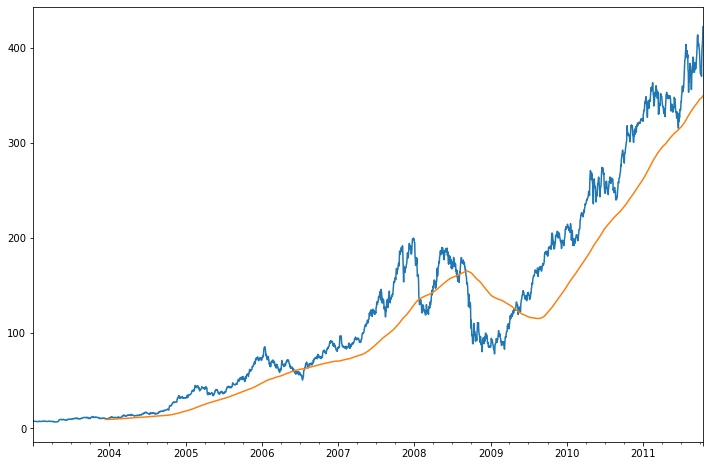

In [105]:
# now i introduce the rolling() operation, which behaves similarly to resample() and groupby()
# it can be called on a Series or DataFrame along with a 'window' (expressed as a number of periods)

plt.figure(figsize=(12, 8))
close_px['AAPL'].plot()
close_px['AAPL'].rolling(250).mean().plot()

# the expression rolling(250) is similar in behavior to groupby()
# but instead of grouping, it creates an object that enables grouping over a 250-day sliding window
# so here we have the 250-day moving window average of Apple's stock price

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64


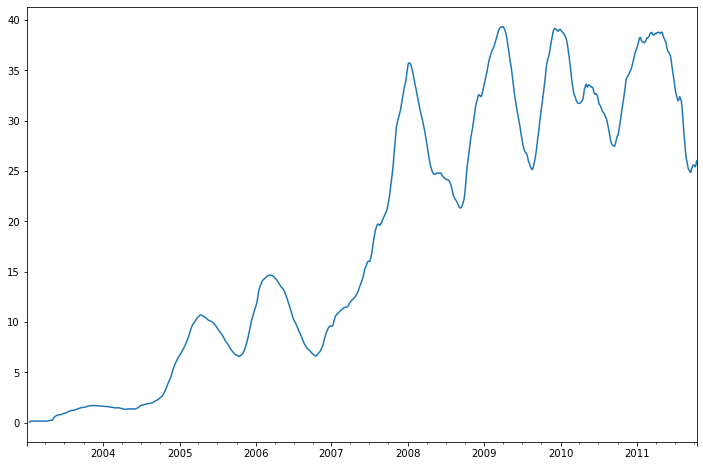

In [106]:
# by default, rolling functions require all of the values in the window to be non-NA
# this behavior can be changed to account for missing data
# and, in particular, the fact that you will have fewer than 'window' periods of data at the beginning of the time series

plt.figure(figsize=(12, 8))

aapl_std250 = close_px.AAPL.rolling(250, min_periods=10).std()
print(aapl_std250[5:12])
_ = aapl_std250.plot()

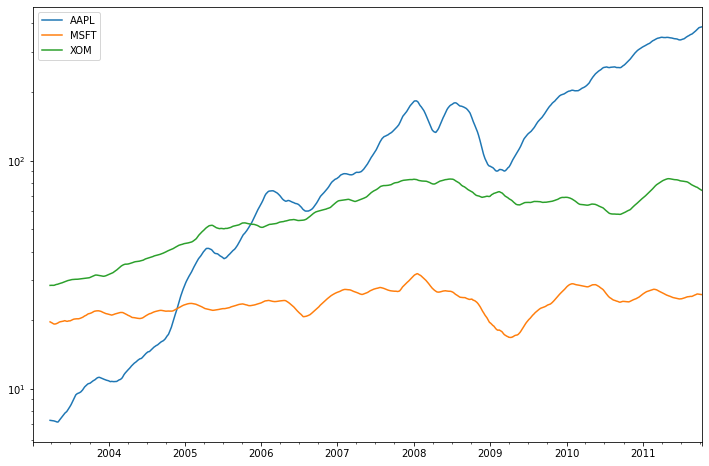

In [107]:
# in order to compute an 'expanding window mean'
# use the expanding() operator instead of rolling()
# the expanding mean starts the time window from the beginning of the time series 
# and increases the size of the window until it encompasses the whole series
# an exanding window mean on the apple_std250 time series looks like this

expanding_mean = aapl_std250.expanding().mean()

# calling a window function on a DataFrame applies the transformation to each column
fig, ax = plt.subplots(figsize=(12, 8))
_ = close_px.rolling(60).mean().plot(logy=True, ax=ax)

In [108]:
# the rolling() function also accepts a string indicating a fixed-size time offset rather than a set of periods
# using this notation can be useful for irregular time series
# these are the same strings that you can pass to resample

# for example, we could compute a 20-day rolling mean like so
close_px.rolling('20D').mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
...,...,...,...
2011-10-10,389.351429,25.602143,72.527857
2011-10-11,388.505000,25.674286,72.835000
2011-10-12,388.531429,25.810000,73.400714
2011-10-13,388.826429,25.961429,73.905000


## 11.7.1 Exponentially Weighted Functions

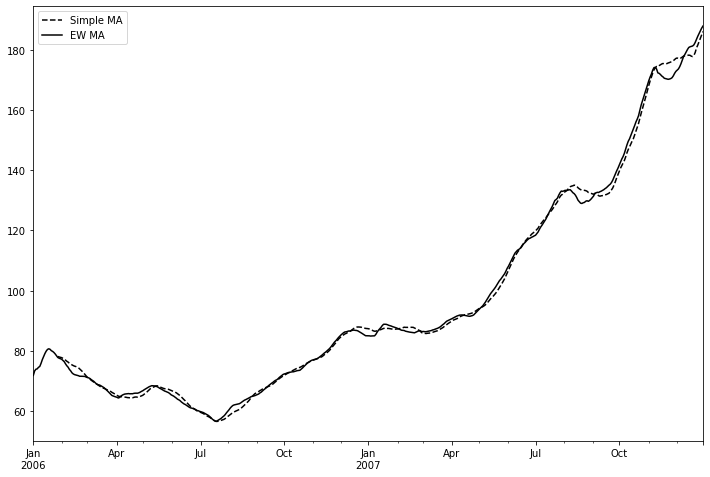

In [109]:
# an alternative to using a static window size with equally weighted observations 
# is to specify a constant decay factor to give more weight to more recent observations
# there are a couple of ways to specify the decay factor
# a popular one is using a span, which makes the result comparable to a simple moving window function with window size equal to the span

# Since an exponentially weighted statistic places more weight on more recent observations, 
# it “adapts” faster to changes compared with the equal-weighted version

# pandas has the ewm() operator to go along with rolling() and expanding()
# here's an example comparing a 60-day moving average of Apple's stock price with an EW moving average with span=60

aapl_px = close_px.AAPL['2006':'2007']
ma60 = aapl_px.rolling(30, min_periods=20).mean()
ewma60 = aapl_px.ewm(span=30).mean()

fig, ax = plt.subplots(figsize=(12, 8))
ma60.plot(style='k--', label='Simple MA', ax=ax)
ewma60.plot(style='k-', label='EW MA', ax=ax)
_ = plt.legend()

## 11.7.2 Binary Moving Window Functions

In [110]:
# some statistical operators, like correlation and covariance, need to operate on two time series

# as an example
# financial analysts are often interested in a stock's correlation to a benchmark index like the S&P 500
# to have a look at this, we first compute the percent change for all of our time series of interest

spx_px = close_px_all['SPX']
spx_rets = spx_px.pct_change()
returns = close_px.pct_change()

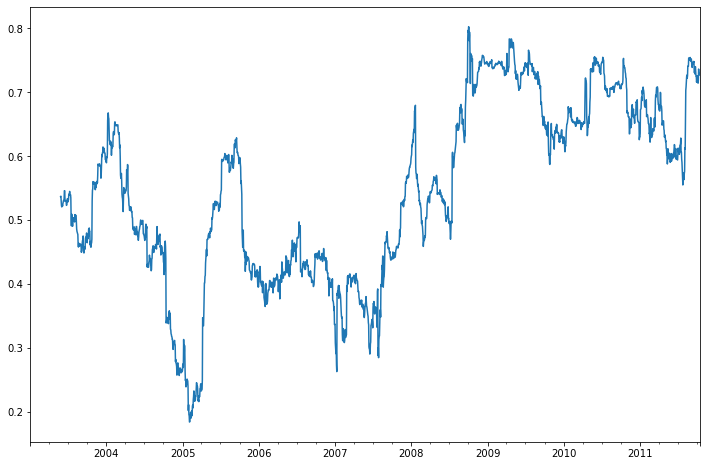

In [111]:
# the corr() aggregation function after we call rolling() can then compute the rolling correlation with spx_rets

corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets)

_ = plt.figure(figsize=(12, 8))
_ = corr.plot()

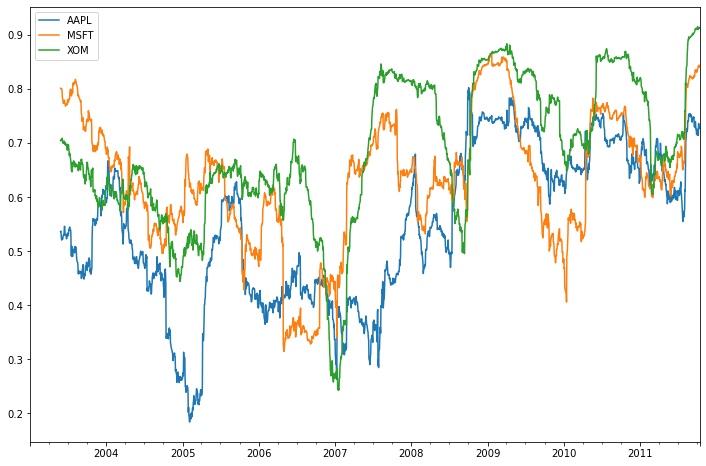

In [112]:
# suppose you wanted to compute the correlation of the S&P 500 index with many stocks at once 
# writing a loop and creating a new DataFrame would be easy but might get repetitive
# so if you pass a Series and a DataFrame, 
# a function like rolling_corr() will compute the correlation of the Series (spx_rets in this case) with each column in the DataFrame

corr = returns.rolling(125, min_periods=100).corr(spx_rets)
fig, ax = plt.subplots(figsize=(12, 8))
_ = corr.plot(ax=ax)

## 11.7.3 User-Defined Moving Window Functions

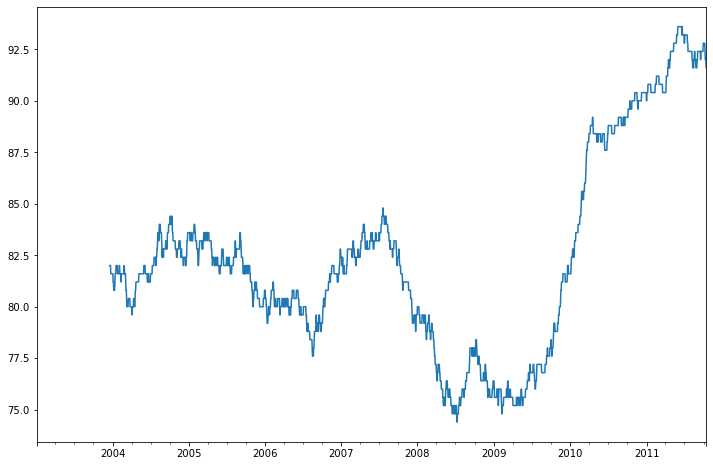

In [113]:
# the apply() method on rolling() and related methods 
# provides a means to apply an array function of you own devising over a moving window
# the only requirement is that the function produce a single value (a reduction) from each piece of the array

# for example, while we can compute sample quantiles using rolling(...).quantile(q)
# we might be interested in the particular rank of a particular value over the sample
# the scipy.stats.percentileofscore() function does just this

from scipy.stats import percentileofscore
score_at_2percent = lambda x : percentileofscore(x, 0.02)
result = returns.AAPL.rolling(250).apply(score_at_2percent)

fig, ax = plt.subplots(figsize=(12, 8))
_ = result.plot(ax=ax)